# Рынок заведений общественного питания Москвы

Принято решение открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Для привлечения инвестиций необходимо изучить текущее положение дел на рынке и определить сможет ли заведение снискать популярность на долгое время. Какое заведение это будет и где лучше его открыть? В распоряжении есть открытые данные о заведениях общественного питания в Москве.

## Оглавление:
* [Импортировать файлы и изучить данные в них](#one)
* [Анализ данных](#two)
* [Вывод](#three)

## Импортировать файлы и изучить данные в них. <a name="one"></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re

In [16]:
df = pd.read_csv('/datasets/rest_data.csv')

In [17]:
df

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [18]:
# Приведем названия объектов к однотипному написанию (строчными буквами) и проверим на дубликаты
df['object_name'] = df['object_name'].str.lower() 
df

,id,object_name,chain,object_type,address,number
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


In [19]:
df.duplicated().sum()

0

In [20]:
df['id'].nunique()

15366

In [21]:
df.loc[df.duplicated(subset=['object_name', 'chain', 'object_type', 'address', 'number'])]

,id,object_name,chain,object_type,address,number
2381,28611,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",100
3397,71896,буфет «коникс-школьник»,нет,буфет,"город Москва, улица Удальцова, дом 21",100
3481,20914,буфет мади,нет,буфет,"город Москва, Ленинградский проспект, дом 64",40
4431,23759,столовая гбоу города москвы № 384,нет,буфет,"город Москва, Беловежская улица, дом 67",100
4537,23391,столовая «комбинат питания космос»,нет,столовая,"город Москва, Новозаводская улица, дом 12/11",15
...,...,...,...,...,...,...
14578,222932,старый баку,нет,кафе,"город Москва, Кировоградская улица, владение 15А",120
14596,204947,буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14844,219518,sushi-make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15173,218542,кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0


In [22]:
df[df['object_name'] == 'буфет при кинотеатре']

,id,object_name,chain,object_type,address,number
14595,204952,буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0
14596,204947,буфет при кинотеатре,нет,буфет,"город Москва, Ореховый бульвар, дом 22А",0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [24]:
df['object_type'].value_counts()

кафе                                 6099
столовая                             2587
ресторан                             2285
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

В таблице 15366 строк и 6 столбцов. Типы данных в столбцах соответствуют содержащейся в них информации, пропусков нет. Названия столбцов корректны, в типах объектов ошибок нет. Дубликаты все-таки есть: повторяются название, адрес, тип объекта и количество мест, но при этом у объектов разные ид. Они могли появиться в результате переригистрации юр.лица, или регистрации двух, а может это результат ошибки. В данном случае их доля всего 0,05%, поэтому оставим как есть.

## Анализ данных. <a name="two"></a>

### Исследуем соотношение видов объектов общественного питания по количеству. 

In [25]:
# Сформируем таблицу с видами объектов и их количеством
object_count = df['object_type'].value_counts().reset_index()
object_count.columns = ['object_type', 'count']
#object_count['percent'] = (object_count['count'] / object_count['count'].sum() * 100).round(1)
object_count

,object_type,count
0,кафе,6099
1,столовая,2587
2,ресторан,2285
3,предприятие быстрого обслуживания,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,магазин (отдел кулинарии),273


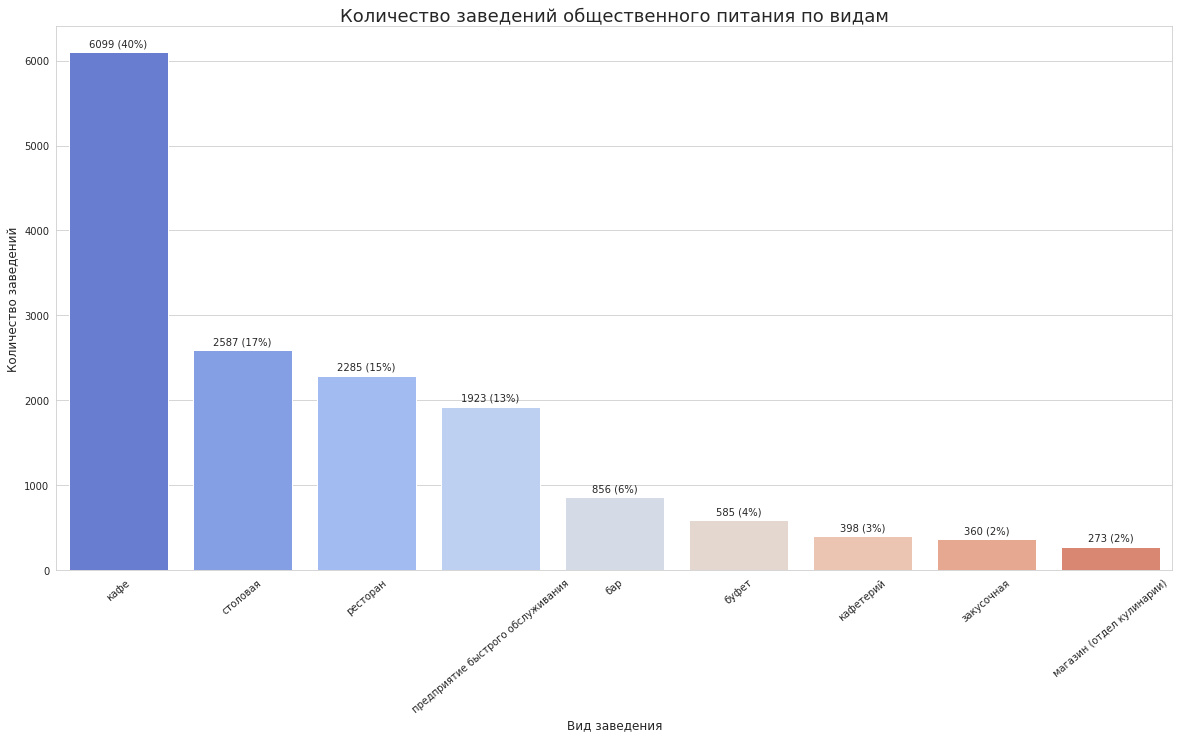

In [26]:

plt.figure(figsize=(20,10))
sns.set_style("whitegrid")
sns.set_palette('coolwarm', 10) 
bar = sns.barplot(x='object_type', y='count', data = object_count,
                 order = object_count.sort_values('count', ascending = False).object_type)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f')+' ('+ format(p.get_height()/object_count['count'].sum()*100, '.0f') + '%)', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
bar.set_xticklabels(object_count.sort_values('count', ascending = False)['object_type'],rotation=40)
plt.title('Количество заведений общественного питания по видам', fontsize = 18)
plt.xlabel('Вид заведения', fontsize = 12)
plt.ylabel('Количество заведений', fontsize = 12)
plt.show()

<Figure size 1440x1080 with 0 Axes>

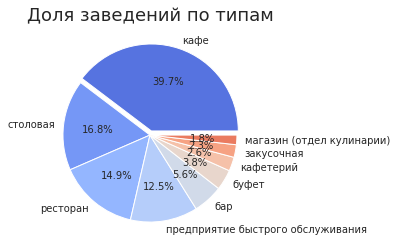

In [27]:

plt.figure(figsize=(20,15))
#sns.set_palette('Paired', 9) 
labels = object_count.sort_values(by = 'count', ascending = False)['object_type']
sizes = object_count.sort_values(by = 'count', ascending = False)['count']
explode = (0.05, 0, 0, 0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%')
plt.title('Доля заведений по типам', fontsize = 18)
plt.xlabel(None, fontsize = 12)
plt.ylabel(None, fontsize = 12)
plt.show()

Самый распространенный тип заведения в Москве - это кафе. Его доля от общего количества заведений составляет 39,7% (6099шт.). Далее с сильным отрывом идут столовые, рестораны и предприятия быстрого питания. Доли остальных заведений значительно меньше.

### Исследуем соотношение сетевых и несетевых заведений по количеству.

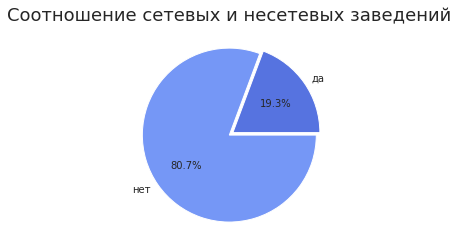

In [28]:
# Построим график соотношения сетевых и несетевых заведений
chain = df.groupby('chain')['id'].nunique().reset_index()

labels = chain['chain']
sizes = chain['id']
explode = (0.05, 0) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%') 
plt.title('Соотношение сетевых и несетевых заведений', fontsize = 18)
plt.show()

Каждое пятое заведение общественного питания в Москве является сетевым. Их доля от общего числа заведений составляет 19,3%. Доля несетевых заведений - 80,7%.

### Определим для какого вида объекта общественного питания характерно сетевое распространение.

In [29]:
# Сформируем таблицу с количеством сетевых и несетевых заведений для каждого типа объекта 
kind_obj_count = df.groupby(['object_type','chain']).agg({'id' : 'count'}).reset_index()
kind_obj_count.columns = ['object_type','chain','count']
kind_obj_count.head()

,object_type,chain,count
0,бар,да,37
1,бар,нет,819
2,буфет,да,11
3,буфет,нет,574
4,закусочная,да,56


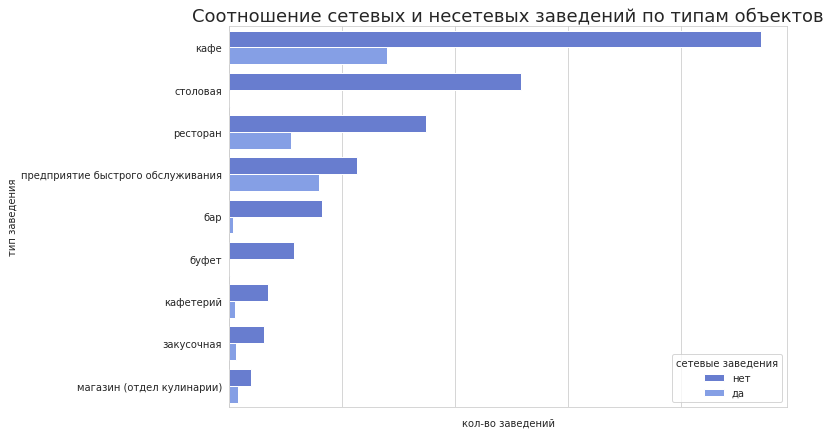

In [30]:
plt.figure(figsize=(10,7))
chains = sns.barplot(x='count', y='object_type', hue='chain', data=kind_obj_count.sort_values(by='count', ascending=False))
chains.set_xticklabels(chains.get_xticklabels(), rotation=90)
chains.set(ylabel='тип заведения', xlabel = 'кол-во заведений')
plt.legend(title='сетевые заведения')
plt.title('Соотношение сетевых и несетевых заведений по типам объектов', fontsize = 18)
plt.show()

In [31]:
# добавим общее количество заведений каждого типа и рассчитаем долю сетевых заведений
kind_obj_count = kind_obj_count.merge(object_count, how = 'left', left_on = 'object_type', right_on = 'object_type')
kind_obj_count['chain_share'] = (kind_obj_count['count_x']/kind_obj_count['count_y'] * 100).round(1)
kind_obj_count = kind_obj_count.query('chain == "да"').sort_values(by = 'chain_share', ascending = False)
kind_obj_count

,object_type,chain,count_x,count_y,chain_share
12,предприятие быстрого обслуживания,да,791,1923,41.1
10,магазин (отдел кулинарии),да,78,273,28.6
14,ресторан,да,544,2285,23.8
6,кафе,да,1396,6099,22.9
4,закусочная,да,56,360,15.6
8,кафетерий,да,52,398,13.1
0,бар,да,37,856,4.3
2,буфет,да,11,585,1.9
16,столовая,да,3,2587,0.1


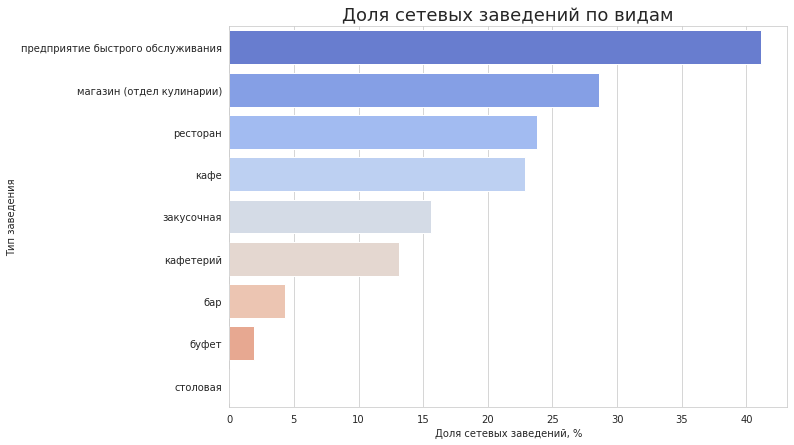

In [32]:
plt.figure(figsize=(10,7))
chainss = sns.barplot(x='chain_share', y='object_type', data=kind_obj_count)
plt.title('Доля сетевых заведений по видам', fontsize = 18)
chainss.set(ylabel='Тип заведения', xlabel = 'Доля сетевых заведений, %')
plt.show()

По количеству сетевых заведений лидируют кафе, но их и в целом больше среди всех заведений. Если смотреть на распространенность сетей по типам объектов, то наиболее характерен "сетевой" формат заведений для предприятий быстрого питания. Доля сетевых заведений в этом сегменте - 41,1%.

### Определим что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?

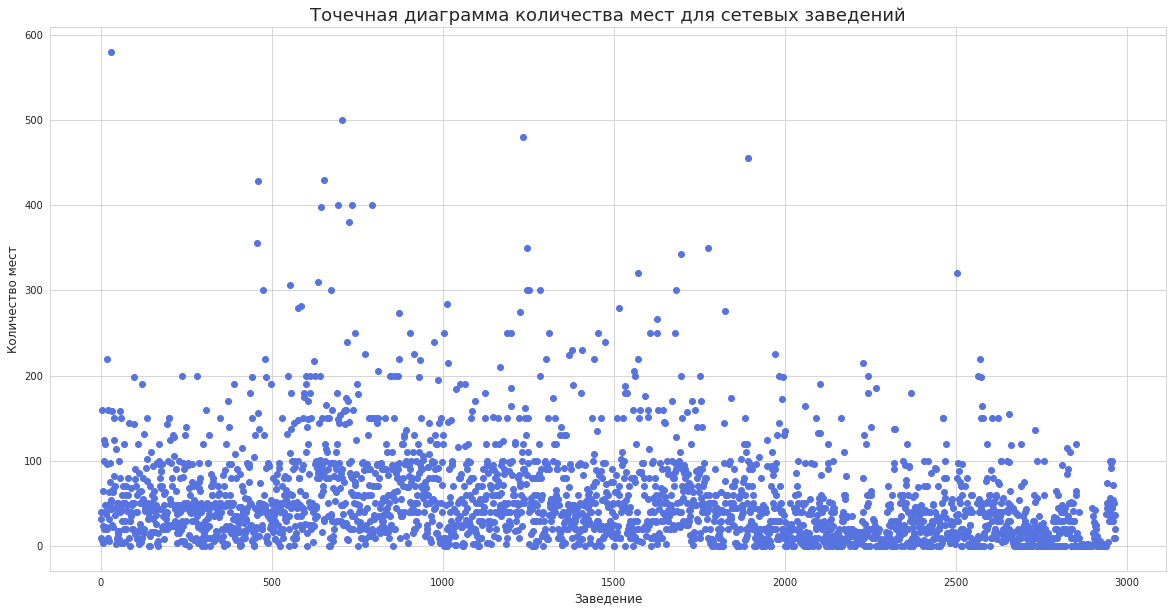

In [33]:
# Построим диаграмму рассеяния количества мест для сетевых заведений 
plt.figure(figsize=(20,10))
x_values = pd.Series(range(0,len(df.query('chain == "да"')['number'])))
plt.scatter(x_values, df.query('chain == "да"')['number'])
plt.title('Точечная диаграмма количества мест для сетевых заведений', fontsize = 18)
plt.xlabel('Заведение', fontsize = 12)
plt.ylabel('Количество мест', fontsize = 12)
plt.show()

In [34]:
# Посмотрим на перцентили
print(np.percentile(df.query('chain == "да"')['number'], [90, 95, 99]))

[120.   158.65 275.33]


In [35]:
print("Среднее количество мест в сетевых заведениях:", format(df.query('chain == "да"')['number'].mean(),'.0f'))
print("Медианное количество мест в сетевых заведениях:", format(df.query('chain == "да"')['number'].median(),'.0f'))

Среднее количество мест в сетевых заведениях: 53
Медианное количество мест в сетевых заведениях: 40


Большинство сетевых заведений имеют до 100 посадочных мест. Не более 10% заведений имеют более 120 посадочных мест. В среднем в сетевых заведениях 53 посадочных маста, медианное значение - 40. Таким образом, можно сказать, что для сетей характерно много заведений с небольшим количеством посадочных мест.

### Определим среднее количество посадочных мест для каждого вида объекта общественного питания. 

In [36]:
# Построим сводную таблицу
mean_seat = df.groupby('object_type').agg({'number' : 'mean'}).reset_index()
mean_seat.columns = ['object_type','mean_number']
mean_seat = mean_seat.sort_values(by = 'mean_number', ascending = False)
mean_seat['mean_number'] = round(mean_seat['mean_number'])
mean_seat

,object_type,mean_number
8,столовая,130.0
7,ресторан,97.0
1,буфет,51.0
0,бар,43.0
3,кафе,40.0
6,предприятие быстрого обслуживания,21.0
4,кафетерий,9.0
2,закусочная,8.0
5,магазин (отдел кулинарии),6.0


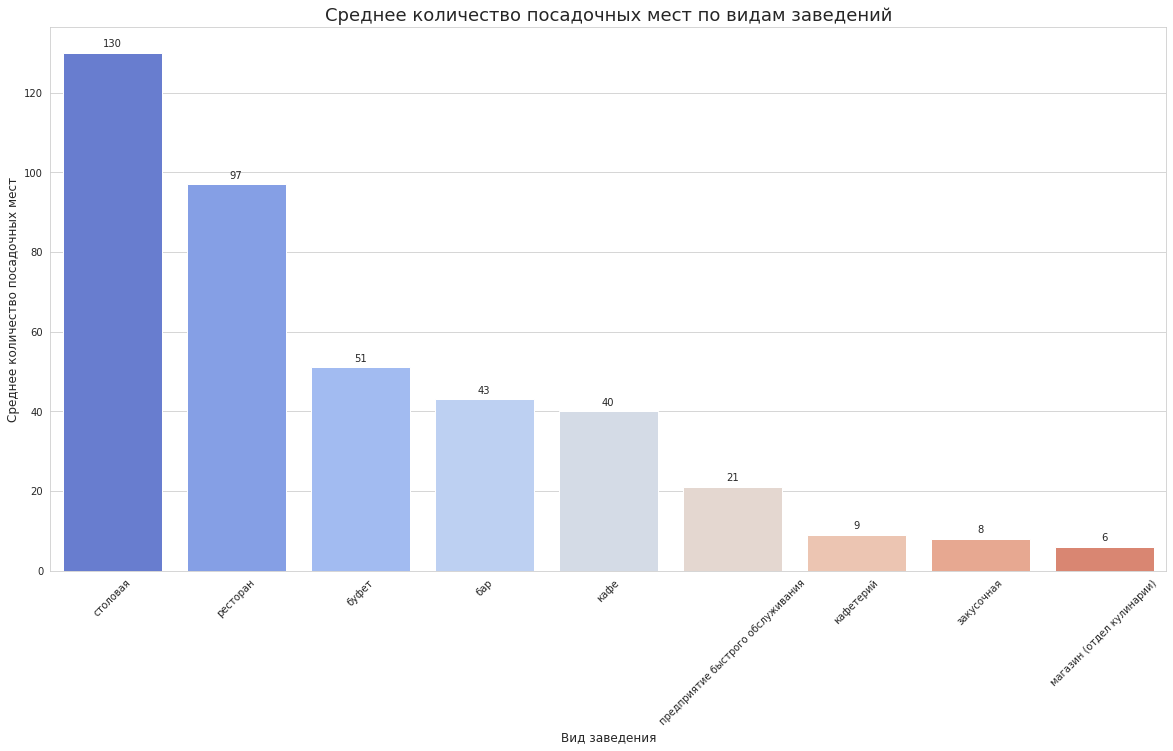

In [37]:
# Построим график среднего количества посадочных мест
plt.figure(figsize=(20,10))
bar = sns.barplot(x='object_type', y='mean_number', data = mean_seat) 
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
bar.set_xticklabels(mean_seat.sort_values('mean_number', ascending = False)['object_type'],rotation=45)
plt.title('Среднее количество посадочных мест по видам заведений', fontsize = 18)
plt.xlabel('Вид заведения', fontsize = 12)
plt.ylabel('Среднее количество посадочных мест', fontsize = 12)
plt.show()

Самое большое среднее количество посадочных мест предоставляют в столовых и ресторанах (130 и 97, соответственно). Самое маленькое - в кафетериях, закусочных и отделах кулинарии (9, 8 и 6), что ожидаемо, т.к. они не рассчитаны на долгие посещения и проведение мероприятий.

### Выделим в отдельный столбец информацию об улице из столбца address 

In [38]:
df['split_address'] = df['address'].str.split(', ')
# выделим первый индекс у всех элементов(улицу)
def get_street(row):
    x = row['split_address'][1]
    return x
df['street'] = df.apply(get_street, axis=1)
df.head()

,id,object_name,chain,object_type,address,number,split_address,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,"[город Москва, улица Егора Абакумова, дом 9]",улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,"[город Москва, улица Талалихина, дом 2/1, корп...",улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,"[город Москва, Абельмановская улица, дом 6]",Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,"[город Москва, Абрамцевская улица, дом 1]",Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,"[город Москва, Абрамцевская улица, дом 9, корп...",Абрамцевская улица


In [39]:
# найдем 'дом' и 'город' в улицах
def get_adress_spec(row):
    house = re.search('дом$|^дом', row['street'])
    town = re.search('город$|^город', row['street'])
    pos = re.search('поселение$|^поселение', row['street'])
    if house == None:
        if town == None:
            return 'ок'
        else:
            return 'город'
    else:
        return 'дом'
df['house_or_town'] = df.apply(get_adress_spec, axis=1)
df['house_or_town'].value_counts()

ок       14907
город      399
дом         60
Name: house_or_town, dtype: int64

In [40]:
df[df['house_or_town'] == 'дом'].head()

,id,object_name,chain,object_type,address,number,split_address,street,house_or_town
859,23601,буфет - гбоу сош № 64,нет,буфет,"Партизанская улица, дом 30",100,"[Партизанская улица, дом 30]",дом 30,дом
860,23604,буфет - гбоу 60,нет,буфет,"Партизанская улица, дом 30",100,"[Партизанская улица, дом 30]",дом 30,дом
1491,25349,ресторан «гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,"[Поречная улица, дом 5/14, строение 1]",дом 5/14,дом
7691,132359,кафе «la carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198,"[1-й Нагатинский проезд, дом 10]",дом 10,дом
7827,28214,роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80,"[Софийская набережная, дом 26/1, строение 1]",дом 26/1,дом


In [41]:
# указываем улицу, в зависимости от заполнения 'street' 
def get_street_name(row):
    if row['house_or_town'] == 'дом':
        x = row['split_address'][0]
    else:
        if row['house_or_town'] == 'город':
            x = row['split_address'][2]
        else:
            x = row['split_address'][1]
    return x
df['street'] = df.apply(get_street_name, axis=1)

df[df['house_or_town'] == 'дом'].head()

,id,object_name,chain,object_type,address,number,split_address,street,house_or_town
859,23601,буфет - гбоу сош № 64,нет,буфет,"Партизанская улица, дом 30",100,"[Партизанская улица, дом 30]",Партизанская улица,дом
860,23604,буфет - гбоу 60,нет,буфет,"Партизанская улица, дом 30",100,"[Партизанская улица, дом 30]",Партизанская улица,дом
1491,25349,ресторан «гранатовый сад»,нет,ресторан,"Поречная улица, дом 5/14, строение 1",40,"[Поречная улица, дом 5/14, строение 1]",Поречная улица,дом
7691,132359,кафе «la carotte»,нет,кафе,"1-й Нагатинский проезд, дом 10",198,"[1-й Нагатинский проезд, дом 10]",1-й Нагатинский проезд,дом
7827,28214,роснефть (закрытое),нет,столовая,"Софийская набережная, дом 26/1, строение 1",80,"[Софийская набережная, дом 26/1, строение 1]",Софийская набережная,дом


In [42]:
# удаляем вспомогательные столбцы
df = df.drop(['house_or_town', 'split_address'], axis=1)
df.head()

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


### Определим топ-10 улиц по количеству объектов общественного питания. 

In [43]:
# Сформируем таблицу c количеством объектов общественного питания в Москве в разрезе улиц и выделим TOP-10
top_streets = df[df['street'] != 'поселение Сосенское'].groupby('street').agg({'id' : 'count'})\
    .reset_index().sort_values(by = 'id', ascending = False).head(10)
top_streets.columns = ['street','count']
top_streets

,street,count
1562,проспект Мира,204
1024,Профсоюзная улица,183
701,Ленинградский проспект,173
1007,Пресненская набережная,167
418,Варшавское шоссе,163
704,Ленинский проспект,147
1558,проспект Вернадского,132
692,Кутузовский проспект,114
616,Каширское шоссе,112
622,Кировоградская улица,110


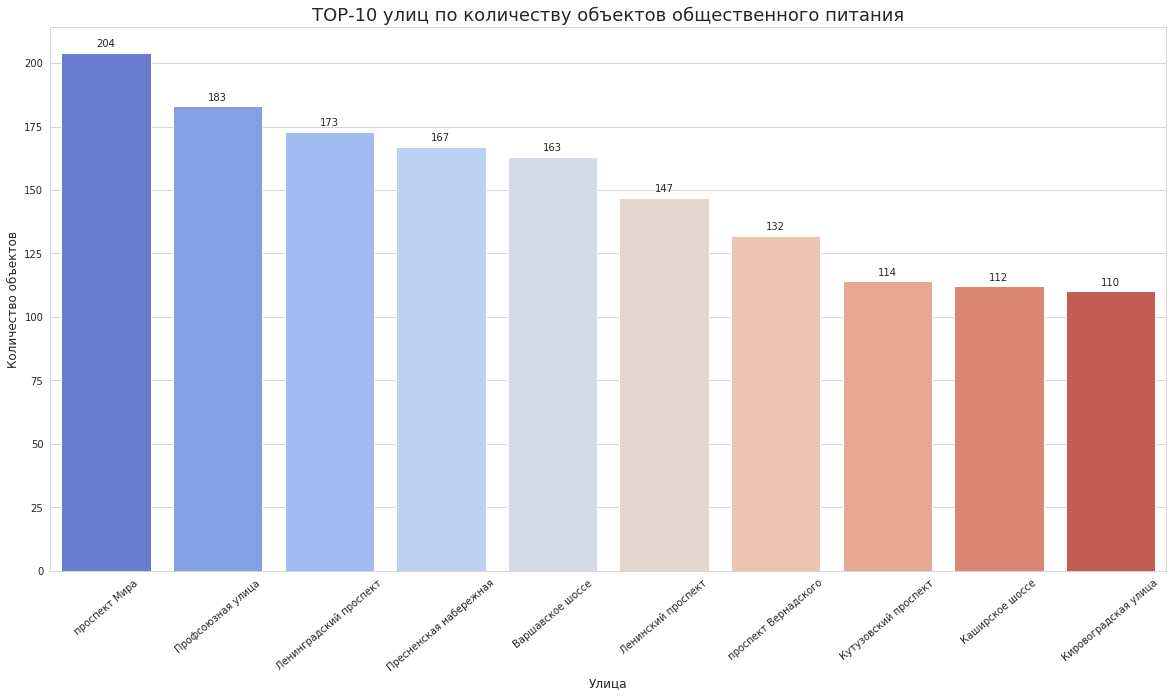

In [44]:
plt.figure(figsize=(20,10))
bar = sns.barplot(x='street', y='count', data = top_streets)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
bar.set_xticklabels(top_streets['street'],rotation=40)
plt.title('TOP-10 улиц по количеству объектов общественного питания', fontsize = 18)
plt.xlabel('Улица', fontsize = 12)
plt.ylabel('Количество объектов', fontsize = 12)
plt.show()

Больше всего заведений находится на Проспекте Мира. Далее с близкими показателями следуют Профсоюзная улица, 
Ленинградский проспект, Пресненская набережная и Варшавское шоссе. 

In [ ]:
# Сохраним данные о районах в файл (или тут http://hubofdata.ru/storage/f/2013-10-22T09%3A25%3A27.793Z/mosgaz-streets.csv)
file = pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')
file.columns = ['street', 'areaid', 'okrug', 'area']
file

In [ ]:
# Добавим информацию о районах к данным о заведениях, находящихся на TOP-10 улицах
top_objects = top_streets.merge(file, how = 'left', left_on = 'street', right_on = 'street')
top_objects.head()

In [ ]:
#top_objects = top_objects.dropna()
top_10 = top_objects.groupby(['street', 'count'])['okrug'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
top_10 = top_10.sort_values(by='count')
top_10

In [ ]:
# Посчитаем количество заведений с ТОР-10 улиц по округам
okrug = top_10.groupby('okrug')['count'].sum().reset_index()
okrug.columns = ['okrug', 'count']
okrug = okrug.sort_values(by='count', ascending=False)
okrug

In [ ]:
plt.figure(figsize=(20,10))
bar = sns.barplot(x='okrug', y='count', data = okrug)
for p in bar.patches:
    bar.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
bar.set_xticklabels(okrug['okrug'],rotation=40)
plt.title('Расположение ТОР-10 улиц по округам', fontsize = 18)
plt.xlabel('Округ Москвы', fontsize = 12)
plt.ylabel('Количество объектов', fontsize = 12)
plt.show()

Большинство улиц из ТОР-10 очень протяженные и относятся к нескольким районам. Больше всего заведений располагается на улицах в ЮАО (южный административный округ). Также улицы с ТОР-10 располагаются в ЮЗАО (юго-западный ао), ЗАО (западный ао), СВАО (северо-восточный ао), САО (северный ао) и ЦАО (центральный ао).

### Найдем число улиц с одним объектом общественного питания. 

In [ ]:
one_object = df.groupby('street')['id'].nunique().reset_index().query('id ==1')
one_object.count()

In [ ]:
one_object = one_object.merge(file, how = 'left', left_on = 'street', right_on = 'street')
one_object = one_object.dropna()
one_object 

In [ ]:
one_object_okrug = one_object.groupby(['street', 'id'])['okrug'].agg(lambda x: pd.Series.mode(x)[0]).reset_index()
one_object_okrug

In [ ]:
one_object_okrug = one_object_okrug.groupby('okrug')['id'].sum().reset_index()
one_object_okrug.columns = ['okrug', 'count']
one_object_okrug = okrug.sort_values(by='count')
one_object_okrug

В основном улицы с одним объектом общественного питания находятся в Центральной части Москвы, возможно, это связано с тем, что в центре много есть много улиц/переулков, удаленных от более оживленных улиц, и владельцам невыгодно размещаться на таких улицах, т.к. основной поток людей не будет затрагивать эти заведения.

### Посмотрим на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания.

In [ ]:
# Отберем точки с TOP-10 улиц
top_objects = df.merge(top_objects, how = 'inner', left_on = 'street', right_on = 'street')
top_objects

In [ ]:
plt.figure(figsize=(20,10))
box = sns.boxplot(data=top_objects, y='number', x='street')
box.set_xticklabels(top_objects['street'],rotation=40)
plt.ylim((0, 350))
plt.title('Количество посадочных мест для улиц с большим количеством объектов общественного питания', fontsize = 18)
plt.xlabel('Улица', fontsize = 12)
plt.ylabel('Количество посадочных мест', fontsize = 12)
plt.show()

In [ ]:
print('Среднее количество мест в заведениях TOP-10 улиц:', format(top_objects['number'].mean(),'.0f'))

В среднем, для заведений TOP-10 улиц характерно 58 посадочных мест, но чаще этот показатель не больше 50.

# Вывод <a name="three"></a>

Самый распространенный тип заведения в Москве - это кафе. Его доля от общего количества заведений составляет 39,7% (6099шт.). Далее с сильным отрывом идут столовые, рестораны и предприятия быстрого питания. Доли остальных заведений значительно меньше.
Каждое пятое заведение общественного питания в Москве является сетевым. Их доля от общего числа заведений составляет 19,3%. Доля несетевых заведений - 80,7%.

По количеству сетевых заведений лидируют кафе, но их и в целом больше среди всех заведений. Если смотреть на распространенность сетей по типам объектов, то наиболее характерен "сетевой" формат заведений для предприятий быстрого питания. Доля сетевых заведений в этом сегменте - 41,1%.

Большинство сетевых заведений имеют до 100 посадочных мест. Не более 10% заведений имеют более 120 посадочных мест. В среднем в сетевых заведениях 53 посадочных маста, медианное значение - 40. Таким образом, можно сказать, что для сетей характерно много заведений с небольшим количеством посадочных мест.
Самое большое среднее количество посадочных мест предоставляют в столовых и ресторанах (130 и 97, соответственно). Самое маленькое - в кафетриях, закусочных и отделах кулинарии (9, 8 и 6), что ожидаемо, т.к. они не рассчитаны на долгие посещения и проведение мероприятий.


По расположению больше всего заведений находится на Проспекте Мира. Далее с близкими показателями следуют Профсоюзная улица, 
Ленинградский проспект, Пресненская набережная и Варшавское шоссе. 
Большинство улиц из ТОР-10 очень протяженные и относятся к нескольким районам. Больше всего заведений располагается на улицах в ЮАО (южный административный округ). Также улицы с ТОР-10 располагаются в ЮЗАО (юго-западный ао), ЗАО (западный ао), СВАО (северо-восточный ао), САО (северный ао) и ЦАО (центральный ао).


Для заведений с TOP-10 улиц по количеству объектов общественного питания характерно 58 посадочных мест.

Рекомендуется открыть заведение:
* типа "кафе", т.к. это самый популярный вид  объекта общественного питания;
* с количеством мест - 40, т.к. это среднее количество мест для данного типа объекта;
* в ЦАО, т.к. если открываться в самых популярных для расположения районах, то есть риск столкнуться с высокой конкуренцией. Поэтому, можно попробовать открыться в районах в ЦАО, где есть улицы с 1 объектом общественного питания. Таким образом, можно будет избежать высокой конкуренции и, при этом, иметь возможность завлекать поток людей с оживленных центральных улиц и из близлежащих офисов;
* на первом этапе несетевое, возможно, с перспективой развития.

Презентация: https://disk.yandex.ru/i/C8_IU5LsFGXhBg